In [184]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)



# great tutorial 
# http://chrisalbon.com/python/pandas_list_unique_values_in_column.html
# advanced jupyter tricks
# http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/

In [185]:
# define url
url_0331 = '/Users/shaokuixing/Desktop/whatever/survey_vt_20160331.csv'

In [186]:
# read csv file
rawData = pd.read_csv(url_0331, sep=';', thousands = '.', decimal =',')

In [187]:
# seletct features related to impression and time viewable
subset_rawData=rawData[['deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']]

In [188]:
# select only viewable imp and total time viewable
subset_rawData1 = subset_rawData[['viewableimp','totalviewtime']]
subset_rawData1.dtypes

viewableimp      int64
totalviewtime    int64
dtype: object

In [189]:
# select distinct, list unique values in funnel column
rawData.funnel.unique()

array(['Purchase Intent', 'Interest', 'Recall'], dtype=object)

In [190]:
# filter out data with more than 50 imp and 2500,000 total time viewable
subset_rawData2 = rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Interest')]
# check size
subset_rawData2.shape

(21659, 21)

In [191]:
# select only viewable imp and totaol time viewable
# subset_rawData3 = subset_rawData2[['viewableimp','totalviewtime']]
imp = subset_rawData2['viewableimp']
vtsec = subset_rawData2['totalviewtime']/1000
# result = pd.concat([df1, df4], axis=1)
subset_rawData3 = pd.concat([imp,vtsec], axis=1)
subset_rawData3.shape

(21659, 2)

In [192]:
subset_rawData3.dtypes

viewableimp        int64
totalviewtime    float64
dtype: object

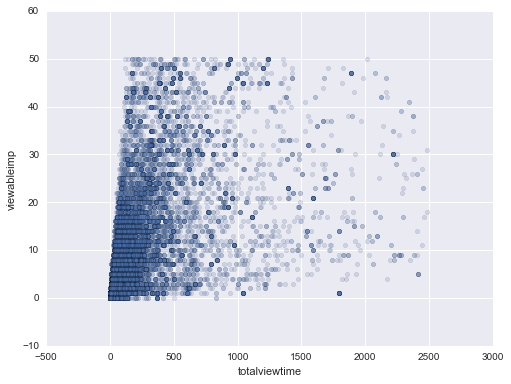

In [193]:
# visualize the relationship between viewable imp and total time viewable
# scatter plot
subset_rawData3.plot(kind='scatter', x='totalviewtime', y='viewableimp', alpha=0.2)

In [194]:
# total row count
funnel = rawData['funnel']
# subset_rawData2 = rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000) & (rawData['funnel']=='Interest')]
interest = rawData[ (rawData['funnel']=='Interest')]['funnel']
interest.count()

24343

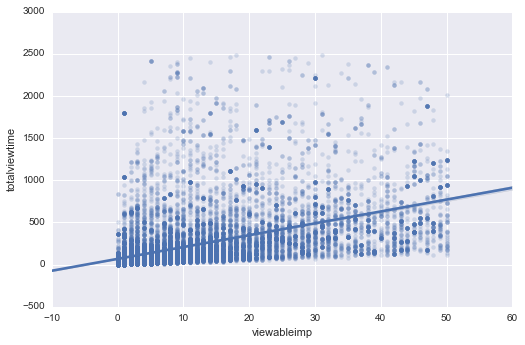

In [195]:
# Seaborn scatter plot with regression line
# sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})
# create a fitted model in 1 line
sns.lmplot(x='viewableimp', y='totalviewtime', data=subset_rawData3, aspect=1.5,scatter_kws={'alpha':0.2} )


In [210]:
# subset recall and other metrics
# recall_metrics = rawData[ (rawData['funnel']=='Recall')].set_index('answerid')
recall_metrics =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Recall')]
recall_metrics.shape


(22232, 21)

In [211]:
#recall_metrics.head()

In [212]:
# LOAD Magic
#%reload_ext rpy2.ipython
#%R summary(recall_metrics)
# recall_metrics.shape
#recall_metrics.head(5)
# list unique values
# rawData.answerid.unique
# count unique values group by
# rawData.groupby('YEARMONTH').CLIENTCODE.nunique()
# unique counts in a series
# rawData['answerid'].value_counts
# count number of uniques
recall_metrics['answerid'].nunique()

10549

In [213]:
recall_metrics.head(1).transpose()

,2
surveyid,291
originaladid,36431
format,swipe
market,FI
uid,6.96526e+18
answersetid,256196
answerid,700781
questionid,84
questiontext,Have you seen this ad on a mobile device before?
optionid,258


In [214]:
recall_metrics =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Recall')]
# sub_recall_metrics=recall_metrics[['optiontext','deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']]

def recall_transform(x):
    if (x['optiontext']=='Yes'):
        return 1
    return 0


In [215]:

# rawData.apply (lambda x: vtScale (x),axis=1).head(10)
# sub_recall_metrics.apply(lambda x: recall_transform (x),axis=1)
# sub_recall_metrics['optiontext'] .apply (lambda x: recall_transform (x), axis=1)
#df[df.columns[2]]
# list all column names
list(rawData.columns.values)
# rawData1 = rawData[['surveyid','']]
#recall_trans = rawData.apply(lambda x: recall_transform(x), axis=1)
#recall_transformed = pd.concat([recall_trans,rawData ], axis=1)

# frecall.columns = ['recall','optiontext','deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']
#recall.head()

['surveyid',
 'originaladid',
 'format',
 'market',
 'uid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'optiontext',
 'iscomplete',
 'isrefgroup',
 'deliveredimp',
 'viewableimp',
 'viewableimp_ic',
 'totalviewtime',
 'funnel',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']

In [216]:
# subset
col = ['surveyid','originaladid','answersetid','answerid','questionid',
 'questiontext','optionid','optiontext','deliveredimp',
 'viewableimp','totalviewtime', 'avgVT/impMiliSec', 'avgVT/ImpSec','avgTVScale']
col
rawData1 = pd.DataFrame(rawData, columns=col)
rawData1.head(1)

,surveyid,originaladid,answersetid,answerid,questionid,questiontext,optionid,optiontext,deliveredimp,viewableimp,totalviewtime,avgVT/impMiliSec,avgVT/ImpSec,avgTVScale
0,291,36430,256039,700459,83,Next time you are about to use/purchase �categ...,255,3,1,1,1756,1756,1.8,1-5


In [217]:
recall_final = recall[ ['recall','optiontext','deliveredimp','viewableimp','viewableimp_ic',
                        'totalviewtime','avgVT/ImpSec','avgTVScale']]
recall_final.head()


KeyError: "['deliveredimp' 'viewableimp_ic'] not in index"

In [284]:
interest =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Interest')]['optiontext']
interest.head()

1     3
4     2
7     3
8     3
12    2
Name: optiontext, dtype: object

In [285]:
# check percentile data
rawData.viewableimp.quantile(0.90)



50.0

In [286]:
rawData.totalviewtime.quantile(0.90)


957468.0

In [287]:
# filter data based on value
rd_clean =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=957468)]
rd_clean[['optiontext','viewableimp','totalviewtime','avgVT/impMiliSec']].describe()

,viewableimp,totalviewtime,avgVT/impMiliSec
count,59673.000000,59673.000000,59673.000000
mean,10.055268,165989.381295,25030.505994
std,11.198665,196317.118280,47502.636624
min,0.000000,302.000000,302.000000
25%,2.000000,28206.000000,6484.000000
50%,6.000000,87076.000000,12524.000000
75%,14.000000,229758.000000,23906.600000
max,50.000000,957468.000000,939009.000000


In [288]:
# subset recall data
recall_raw = rd_clean[(rd_clean['funnel']=='Recall')]
# recall_raw.shape
#(21308, 21)

In [289]:
# create function to transform yes and no to 1 and 0
def recall_transform(x):
    if (x['optiontext']=='Yes'):
        return 1
    return 0


In [290]:
# apply to recall raw data
recall_trans = recall_raw.apply(lambda x: recall_transform(x), axis=1).astype(int)
# recall_trans.head()


In [291]:
# concat calculated field with recall raw data
recall_concat = pd.concat([recall_trans, recall_raw], axis=1)
recall_concat.columns = ['recall','surveyid',
 'originaladid',
 'format',
 'market',
 'uid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'optiontext',
 'iscomplete',
 'isrefgroup',
 'deliveredimp',
 'viewableimp',
 'viewableimp_ic',
 'totalviewtime',
 'funnel',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']
recall_concat.head(1)

,recall,surveyid,originaladid,format,market,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,funnel,avgVT/impMiliSec,avgVT/ImpSec,avgTVScale
3,0,291,36432,swipe,FI,7.217130e+16,256205,700803,84,Have you seen this ad on a mobile device before?,258,No,True,False,45,45,45,469664,Recall,10437,10.4,11-15


In [292]:
# final subsetting for recall
recall = recall_concat[[
 'recall',
 'optiontext',
 'surveyid',
 'originaladid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'viewableimp',
 'totalviewtime',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']]

# reset index
recall = recall.reset_index(drop=True)
# recall.head(5)
# recall.shape
recall.dtypes

recall                int64
optiontext           object
surveyid              int64
originaladid          int64
answersetid           int64
answerid              int64
questionid            int64
questiontext         object
optionid              int64
viewableimp           int64
totalviewtime         int64
avgVT/impMiliSec    float64
avgVT/ImpSec        float64
avgTVScale           object
dtype: object

In [293]:
recall[['recall','viewableimp','totalviewtime','avgVT/impMiliSec']].corr()

,recall,viewableimp,totalviewtime,avgVT/impMiliSec
recall,1.000000,-0.011816,-0.005201,-0.022835
viewableimp,-0.011816,1.000000,0.591875,-0.173190
totalviewtime,-0.005201,0.591875,1.000000,0.327227
avgVT/impMiliSec,-0.022835,-0.173190,0.327227,1.000000


In [294]:
test = recall[['recall','avgTVScale']].groupby(['avgTVScale','recall']).recall.size()
test

avgTVScale  recall
1-5         0         2474
            1         1205
11-15       0         2324
            1         1264
16-20       0         1527
            1          860
21-25       0          688
            1          397
26-30       0          623
            1          462
6-10        0         3245
            1         1828
<=1         0           79
            1           39
ABOVE 31    0         2811
            1         1482
dtype: int64

In [2]:
#cnx.close()
import sqlite3
from pandas.io import sql
cnx = sqlite3.connect(':memory:', timeout=3000)
cnx.text_factory = str


In [3]:
cnx.close()

In [296]:
# write to database
sql.to_sql(recall, name = 'recall', con=cnx, if_exists='replace')

In [297]:
# select data
sql.read_sql("select * from recall limit 1",cnx)

,index,recall,optiontext,surveyid,originaladid,answersetid,answerid,questionid,questiontext,optionid,viewableimp,totalviewtime,avgVT/impMiliSec,avgVT/ImpSec,avgTVScale
0,0,0,No,291,36432,256205,700803,84,Have you seen this ad on a mobile device before?,258,45,469664,10437,10.4,11-15


In [298]:
# select data
sql.read_sql("select avgTVScale, optiontext,count(answersetid) as num from recall group by avgTVScale, optiontext",cnx)

,avgTVScale,optiontext,num
0,1-5,No,2474
1,1-5,Yes,1205
2,11-15,No,2324
3,11-15,Yes,1264
4,16-20,No,1527
5,16-20,Yes,860
6,21-25,No,688
7,21-25,Yes,397
8,26-30,No,623
9,26-30,Yes,462


In [299]:
recall_scale=sql.read_sql("select avgTVScale, 1.00*count(distinct case when optiontext='Yes' then answersetid else null end) / count(distinct answersetid) as PositivePct,  1.0000* count(distinct case when optiontext='No' then answersetid else null end) / count(distinct answersetid) as NegativePct,1.00*count(distinct case when optiontext='Yes' then answersetid else null end)  as PositiveCount,  1.0000* count(distinct case when optiontext='No' then answersetid else null end)  as NegativeCount,  count(distinct answersetid) as totalCount from recall group by avgTVScale", cnx)
recall_scale

,avgTVScale,PositivePct,NegativePct,PositiveCount,NegativeCount,totalCount
0,1-5,0.339058,0.660942,691,1347,2038
1,11-15,0.371254,0.628746,607,1028,1635
2,16-20,0.371807,0.628193,393,664,1057
3,21-25,0.369099,0.630901,172,294,466
4,26-30,0.407407,0.592593,187,272,459
5,6-10,0.368019,0.631981,916,1573,2489
6,<=1,0.387097,0.612903,24,38,62
7,ABOVE 31,0.386731,0.613269,717,1137,1854


In [300]:
recall_scale.reindex(["1", "3", "4" , "5", "6", "2","0","7"  ])

# recall_scale['test'] = df['']/df['sum']
recall_scale.sort_index(ascending=True)

,avgTVScale,PositivePct,NegativePct,PositiveCount,NegativeCount,totalCount
0,1-5,0.339058,0.660942,691,1347,2038
1,11-15,0.371254,0.628746,607,1028,1635
2,16-20,0.371807,0.628193,393,664,1057
3,21-25,0.369099,0.630901,172,294,466
4,26-30,0.407407,0.592593,187,272,459
5,6-10,0.368019,0.631981,916,1573,2489
6,<=1,0.387097,0.612903,24,38,62
7,ABOVE 31,0.386731,0.613269,717,1137,1854


In [301]:
# create categorical database based on numerical data
# http://pandas.pydata.org/pandas-docs/stable/categorical.html

In [302]:
# count distinct, number of unqiue values in a column
rawData['surveyid'].nunique()

86

In [303]:
# add column and populate by value
# sort by ascending order of column value
recall_scale['order'] = np.array(["0.5-5.4", "10.5-15.4" , "15.5-20.4" , "20.5-25.4", "25.5-30.4", "5.5-10.4", "0-0.4", "above 30.5"   ])
# recall_scale['order'] = np.DataFrame([1, 3, 4 , 5, 6, 2,0,7] , index=['x','y','z'])
# recall_scale
# recall_scale.sort_values(by='order', ascending=True)


In [304]:

# drop column
# recall_scale.drop('order', axis=1, inplace=True)
recall_scale


,avgTVScale,PositivePct,NegativePct,PositiveCount,NegativeCount,totalCount,order
0,1-5,0.339058,0.660942,691,1347,2038,0.5-5.4
1,11-15,0.371254,0.628746,607,1028,1635,10.5-15.4
2,16-20,0.371807,0.628193,393,664,1057,15.5-20.4
3,21-25,0.369099,0.630901,172,294,466,20.5-25.4
4,26-30,0.407407,0.592593,187,272,459,25.5-30.4
5,6-10,0.368019,0.631981,916,1573,2489,5.5-10.4
6,<=1,0.387097,0.612903,24,38,62,0-0.4
7,ABOVE 31,0.386731,0.613269,717,1137,1854,above 30.5


In [305]:
#recall_scale.rename({1: 3, 2: 5})
# recall_scale.rename(index={0: '2'})
# rename index (not the same as reindex)
recall_reindex=recall_scale.rename({6: 0, 0: 1, 5:2, 1:3, 2:4, 3:5, 4:6, 7:7})
recall_order = recall_reindex.sort_index(ascending=True)
recall_order

,avgTVScale,PositivePct,NegativePct,PositiveCount,NegativeCount,totalCount,order
0,<=1,0.387097,0.612903,24,38,62,0-0.4
1,1-5,0.339058,0.660942,691,1347,2038,0.5-5.4
2,6-10,0.368019,0.631981,916,1573,2489,5.5-10.4
3,11-15,0.371254,0.628746,607,1028,1635,10.5-15.4
4,16-20,0.371807,0.628193,393,664,1057,15.5-20.4
5,21-25,0.369099,0.630901,172,294,466,20.5-25.4
6,26-30,0.407407,0.592593,187,272,459,25.5-30.4
7,ABOVE 31,0.386731,0.613269,717,1137,1854,above 30.5


In [306]:
# pip install plotly --upgrade
# https://plot.ly/python/getting-started/
import plotly.plotly as py
import plotly.graph_objs as go
# from plotly import __version__
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# init_notebook_mode() 
py.sign_in('mistertooth', '38103td8wi')


In [307]:
# stack bar chart
# https://plot.ly/python/bar-charts/#stacked-bar-chart
Pos= go.Bar(
    y=recall_order.PositivePct,
    x=recall_order.order,
    name = 'Positive Recall'
)
Neg= go.Bar(
    y=recall_order.NegativePct,
    x=recall_order.order,
    name = 'Negative Recall'
)
data = [Pos, Neg]
layout = go.Layout(
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [308]:
# create a smooth line chart with plotly
# https://plot.ly/python/line-charts/
trace = go.Scatter(
    y=recall_order.PositivePct,
    x=recall_order.order,
    mode='lines+markers',
    name="'% Positive Recall'",
    text=["Total Time Viewable VS % Positive Recall"],
    hoverinfo='text+name',
    line=dict(
        shape='spline')
)

data = [trace]

layout = dict(title = 'Total Time Viewable VS ^Positive Recall',
              xaxis = dict(title = 'Total Time Viewable By Second'),
              yaxis = dict(title = '% Positive Recall'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='test-line')

In [310]:
# create double axis on plotly
# https://plot.ly/python/line-charts/
trace1 = go.Scatter(
    y=recall_order.totalCount,
    x=recall_order.order,
#    mode='lines+markers',
    name="'Total Count of Response'",
#    text=["Total Time Viewable VS % Number of Response"],
#   hoverinfo='text+name',
#    line=dict(shape='linear')
)
trace2 = go.Scatter(
    y=recall_order.PositivePct,
    x=recall_order.order,
#    mode='lines+markers',
    name="'% Positive Recall'",
#    text=["Total Time Viewable VS % Positive Recall"],
#    hoverinfo='text+name',
#    line=dict(
#        shape='spline', 
    yaxis='y2')


data = [trace1, trace2]

layout = go.Layout(
              title = 'Total Time Viewable VS Number of Response',
              xaxis = dict(title = 'Total Time Viewable By Second'),
              yaxis = dict(title = 'Number of Response'),
              yaxis2 = dict(title = '% Positive Recall',overlaying='y',side='right')
              )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='double axis')

In [311]:
# excel pivot table directly on jupyter
# http://nicolas.kruchten.com/content/2015/09/jupyter_pivottablejs/
# pip install pivottabljs
from pivottablejs import pivot_ui
pivot_ui(recall)

In [312]:
# pandas pivot table 
# http://pbpython.com/pandas-pivot-table-explained.html

In [313]:
# pip install vincent
# https://vincent.readthedocs.org/en/latest/quickstart.html
import vincent
from vincent import AxisProperties, PropertySet, ValueRef

In [314]:
# pip install bokeh
# http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb#Tutorial
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [3]:
# import bokeh.sampledata
# bokeh.sampledata.download()


In [5]:
from bokeh.sampledata.world_cities import data
data.head()




,name,lat,lng
0,Ordino,42.55623,1.53319
1,les Escaldes,42.50729,1.53414
2,la Massana,42.54499,1.51483
3,Encamp,42.53474,1.58014
4,Canillo,42.56760,1.59756


In [319]:
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.sampledata.world_cities import data
#data.head()
from bokeh.sampledata.world_cities import data
from bokeh.models import (
    GMapOptions, GMapPlot, ColumnDataSource, PanTool, WheelZoomTool, Circle, Range1d
)

p = GMapPlot(
    x_range=Range1d(-160, 160), y_range=Range1d(-80, 80),
    plot_width=1000,plot_height=500,
    map_options=GMapOptions(lat=48.77, lng=9.18, zoom=4),
    title="Cities with more than 5,000 people",
    webgl=True, responsive=True)

circle = Circle(x="lng", y="lat", size=5, line_color=None, fill_color='firebrick', fill_alpha=0.3)
p.add_glyph(ColumnDataSource(data), circle)
p.add_tools(PanTool(), WheelZoomTool())
show(p)

In [320]:
# seaborn
# https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-modelss
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [281]:
#sns.regplot(x="recall", y="totalviewtime", data=recall)